##1st step of reading the data in

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
df=pd.read_csv('PFE.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-11-26,23.092979,23.263758,23.064516,23.235294,17.072605,37703793
1,2012-11-27,23.017078,23.197344,22.979128,23.007589,16.905291,32539826
2,2012-11-28,22.988615,23.425047,22.912712,23.406073,17.198086,31162248
3,2012-11-29,23.444023,23.652752,23.444023,23.576851,17.323576,33352881
4,2012-11-30,23.633776,23.795067,23.453510,23.738140,17.442074,39200895


In [16]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2156,2021-06-21,38.880001,39.480000,38.880001,39.419998,39.419998,19488100
2157,2021-06-22,39.410000,39.689999,39.259998,39.610001,39.610001,15975900
2158,2021-06-23,39.630001,39.660000,38.980000,39.049999,39.049999,22025400
2159,2021-06-24,39.139999,39.349998,39.080002,39.189999,39.189999,13429200
2160,2021-06-25,39.119999,39.404999,38.889999,38.980000,38.980000,21742080


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2161 entries, 0 to 2160
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2161 non-null   object 
 1   Open       2161 non-null   float64
 2   High       2161 non-null   float64
 3   Low        2161 non-null   float64
 4   Close      2161 non-null   float64
 5   Adj Close  2161 non-null   float64
 6   Volume     2161 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 118.3+ KB


##Visualization

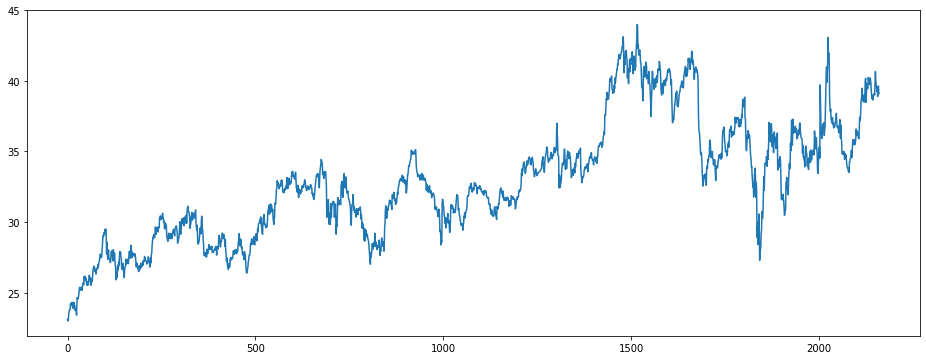

In [18]:
df['Open'].plot(figsize=(16,6))

In [19]:
df.iloc[:, 1:2].values.shape

(2161, 1)

In [77]:
import math
math.floor(98/100*2161)-1

2116

##Getting the training data ready

Approximately using 98% for training and around 2% for testing.

In [78]:
98/100*2161

2117.7799999999997

In [79]:
val=math.floor(98/100*len(df))-1

In [80]:
train_data=df.iloc[:val, 1:2].values

##Feature Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
train_s = scaler.fit_transform(train_data)

##Creating data with timestamps

In [83]:
X_train = []
y_train = []
for i in range(60, val):
    X_train.append(train_s[i-60:i, 0])
    y_train.append(train_s[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

##Creating our LSTM model

In [82]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
seq = Sequential()
seq.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
seq.add(Dropout(0.2))

seq.add(LSTM(units = 50, return_sequences = True))
seq.add(Dropout(0.2))

seq.add(LSTM(units = 50, return_sequences = True))
seq.add(Dropout(0.2))

seq.add(LSTM(units = 50))
seq.add(Dropout(0.2))

seq.add(Dense(units = 1))

seq.compile(optimizer = 'adam', loss = 'mean_squared_error')

seq.fit(X_train, y_train, epochs = 100, batch_size = 32)

##Defining our test data

In [84]:
test_data=df.iloc[val:, 1:2].values

In [93]:
inputs = df[len(df) - (len(df)-val) - 60:]['Open'].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(60, (len(df)-val+1)+60):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = seq.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

##Checking out the results.

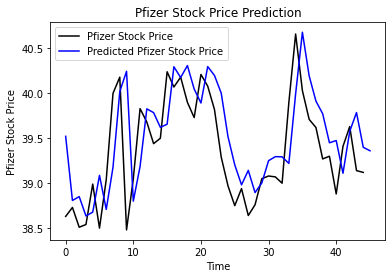

In [94]:
plt.plot(df.iloc[2116:, 1:2].values, color = 'black', label = 'Pfizer Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Pfizer Stock Price')
plt.title('Pfizer Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Pfizer Stock Price')
plt.legend()
plt.show()

##Deployment

In [101]:
!pip install Flask